<a href="https://colab.research.google.com/github/AbhishekA87/ML_Files/blob/main/Copy_of_Fraud_Detection_in_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fraud Detection
Financial fraud is a growing challenge in the digital economy, with millions of daily transactions and fraudsters mimicking legitimate behavior. Detecting such activity in real-time demands advanced data analysis and machine learning.
Fraud is a global concern: 42% of digital payment fraud occurs in Asia-Pacific (Coinlaw.io, 2024), while fraud rates in Latin America are 97% higher than North America and 222% higher than Asia-Pacific (Techopedia, 2023).
This project uses the Credit Card Fraud Detection dataset, where fraud cases represent just 0.17% of all transactions. Through EDA, feature engineering, and ML models, we address the challenges of imbalanced classification and explore strategies for effective fraud detection.

## Downloading the Necessary Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedGroupKFold
!pip install scikit-learn


In [ ]:
#Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML/Portfolio/Fraud_Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Cleaning the Dataset

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.duplicated().sum() #Duplicated rows

np.int64(1081)

In [ ]:
df_new = df.drop_duplicates()
df_new.duplicated().sum()

np.int64(0)

## Exploratory Data Analysis (EDA)

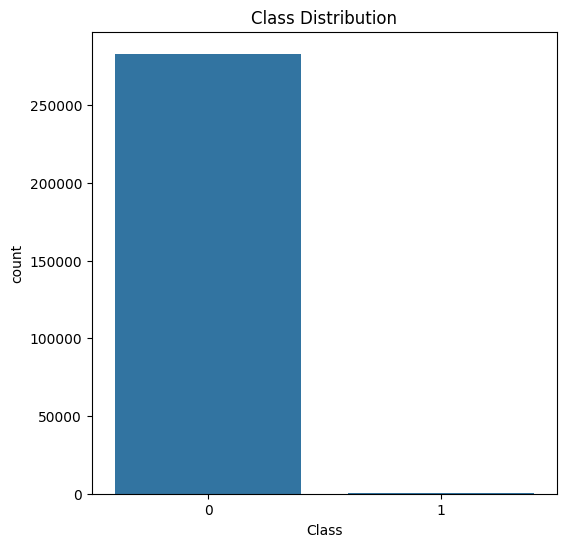

Percentage of fraud: 0.1667%


In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x = 'Class', data = df_new)
plt.title('Class Distribution')
plt.show()
fraud_pct = df_new['Class'].value_counts(normalize = True)[1] * 100
print(f"Percentage of fraud: {fraud_pct:.4f}%")

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


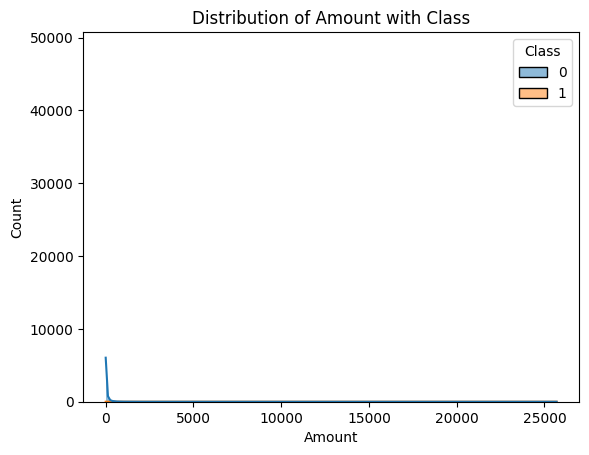

In [ ]:
# Distribution of Amount with Class
sns.histplot(data=df_new, x='Amount', hue='Class', kde=True, log_scale= False)
plt.title('Distribution of Amount with Class')
plt.show()

### The above shows the lesser proportion of fraudulent Transactions and this can further be analysed using the Correlation Matrix

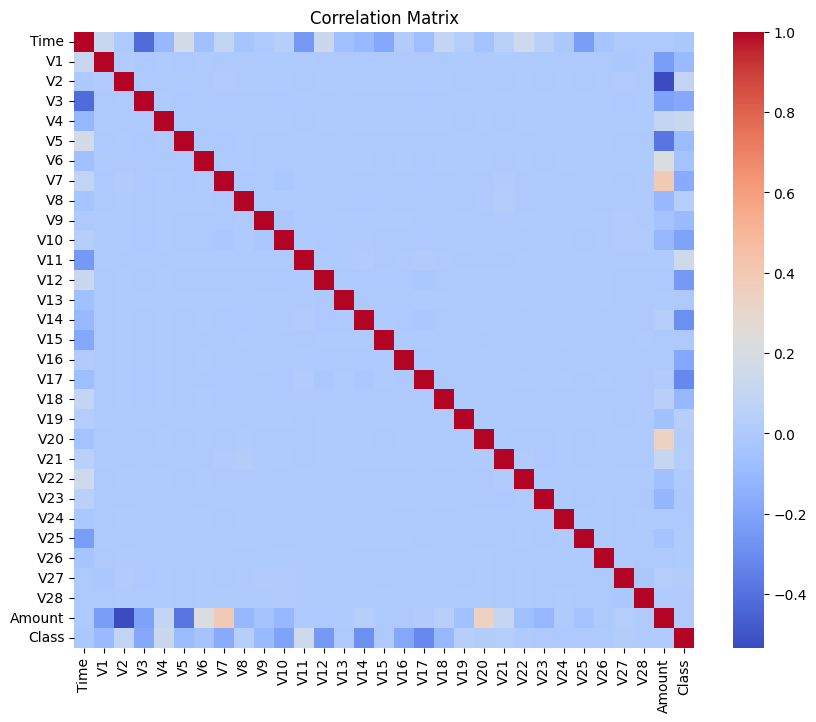

In [ ]:
#Correlation Matrix Chart
plt.figure(figsize=(10, 8))
corr = df_new.corr()
sns.heatmap(df_new.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
# Values Close to 1 indicate Strong positive correlation
# Close to -1 indicate strong negative correlation
# Near 0 will indicate near zero (no linear) correlation

In [ ]:
corr_class = corr['Class'].sort_values(ascending = False)
print(corr_class)

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


### Transaction Distribution and Fraud %age by the Hour

/tmp/ipython-input-3905002965.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Hour"] = (df_new['Time'] // 3600) % 24


Text(0, 0.5, 'Percentage of Fraud')

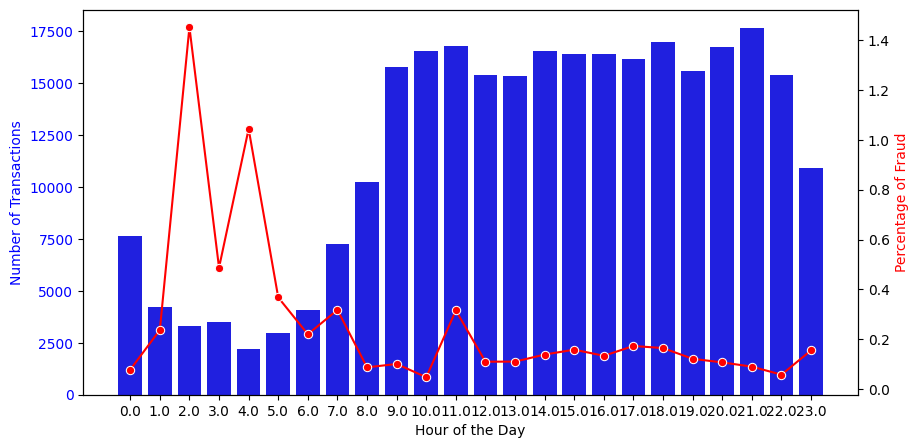

In [ ]:
#New Column with hour of the transaction
df_new["Hour"] = (df_new['Time'] // 3600) % 24

fraud_by_hour = df_new.groupby('Hour')['Class'].mean()*100
transactions_by_hour = df_new['Hour'].value_counts()
#Graphic Representation
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()
sns.barplot(x=transactions_by_hour.index, y=transactions_by_hour.values, ax=ax1, color='blue')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Number of Transactions', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

#Percentage of Fraud
sns.lineplot(x=fraud_by_hour.index, y=fraud_by_hour.values, marker='o', color='red', ax=ax2)
ax2.set_ylabel('Percentage of Fraud', color='red')

### The above clearly highlights the time range of the transactions which are majorly concentrated between 9AM and 9 PM, mainly the business hours

# Identifying the patterns that may exhibit distinctive pattenrs compared to legitimate ones using the Pairplot Diagrams

In [ ]:
#The top correlated features with class
corr = df_new.corr()["Class"].abs().sort_values(ascending = False)
top_features = corr[1:6].index
print(top_features)

Index(['V17', 'V14', 'V12', 'V10', 'V16'], dtype='object')


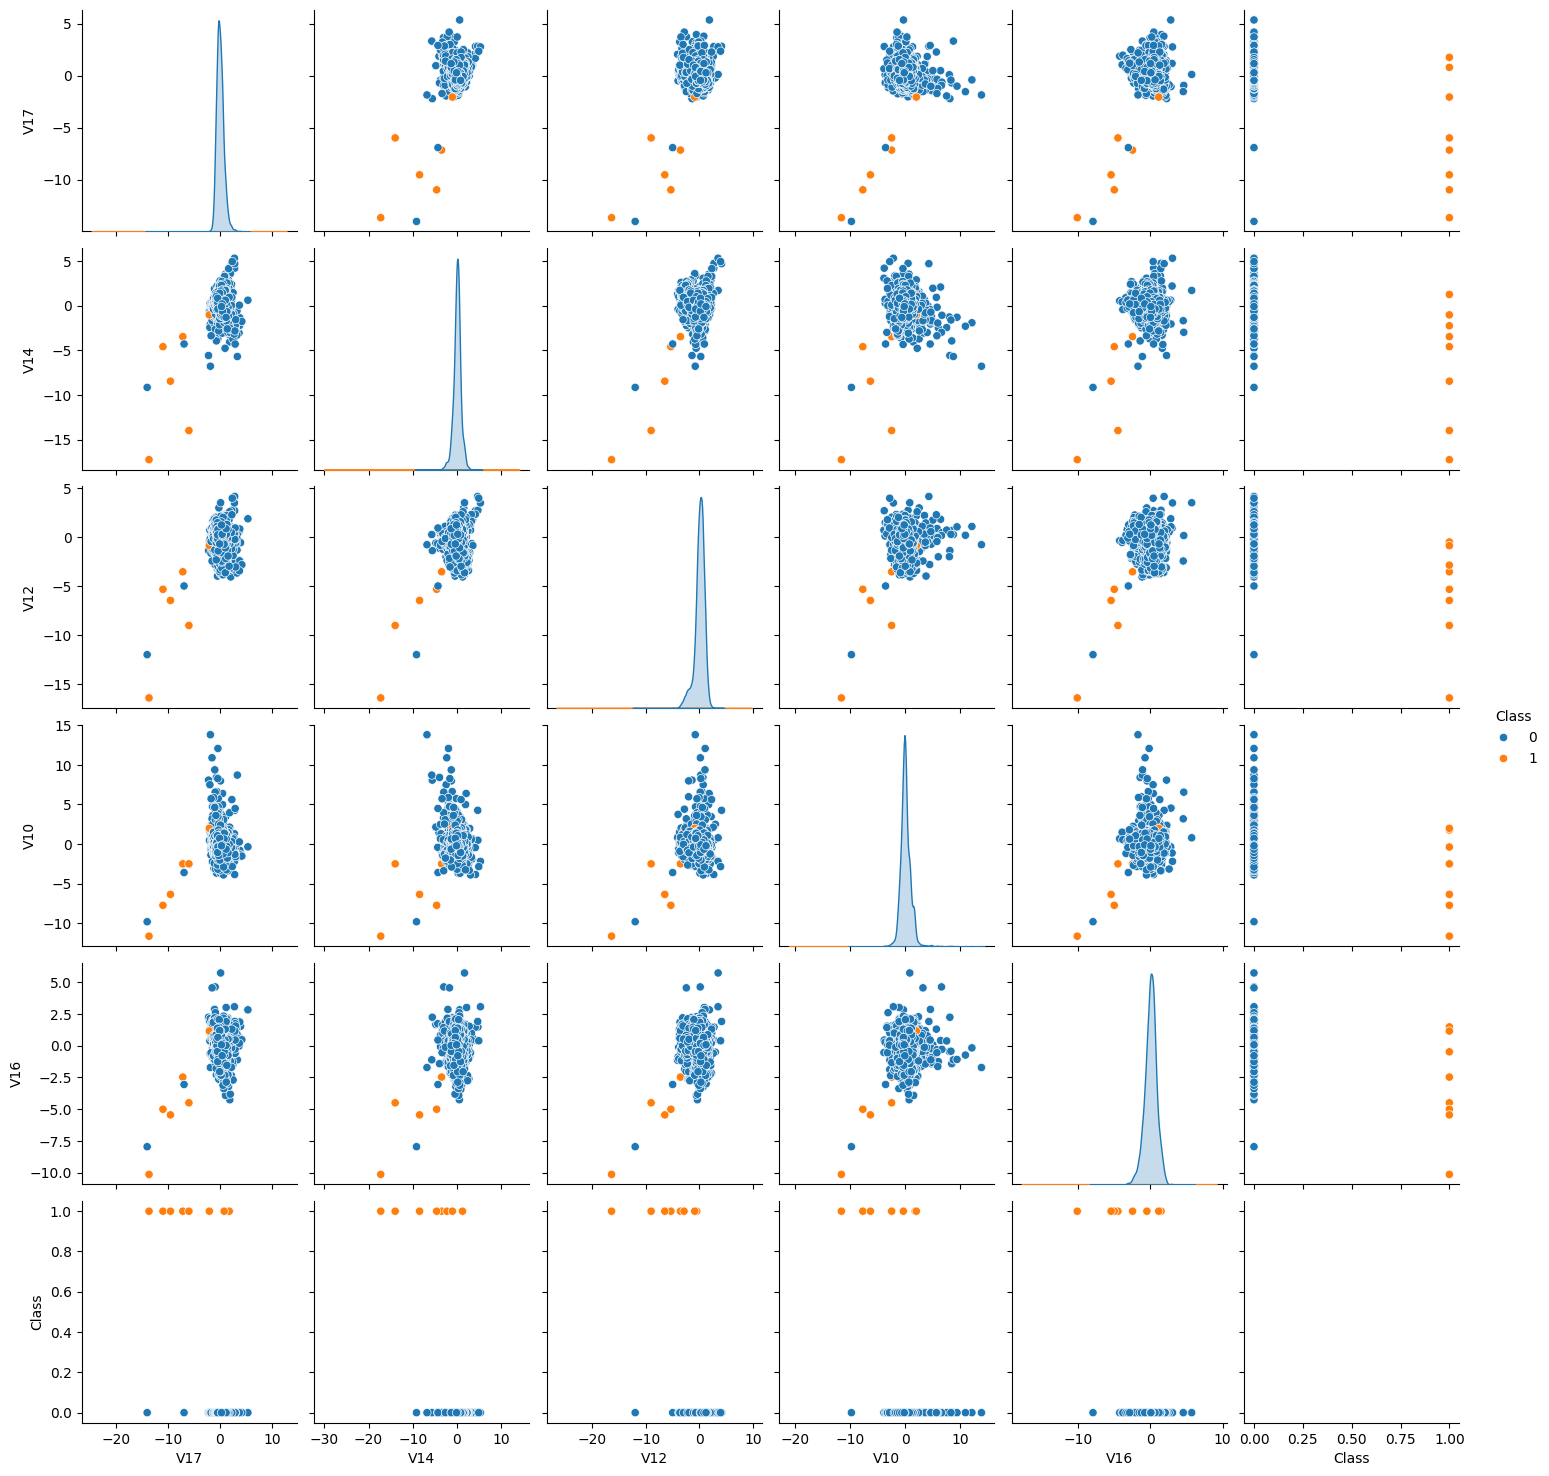

In [ ]:
cols = ['V17', 'V14', 'V12', 'V10', 'V16', 'Class']

#Sample of 6000
sampled_df = df_new.sample(n=6000, random_state=42)
#Pairplot
sns.pairplot(sampled_df, hue='Class', vars=cols)
plt.show()

Feature Engineering: Splitting the dataset and applying the different models to see the most fitting model

In [ ]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0


In [ ]:
df_model = df_new.drop(columns = ["Amount", "Time"])
df_model.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.0


In [ ]:
X = df_model.iloc[:, :-2].values
y = df_model.iloc[:, -2].values
print(X), print(y)

[[-1.35980713e+00 -7.27811733e-02  2.53634674e+00 ... -1.89114844e-01
   1.33558377e-01 -2.10530535e-02]
 [ 1.19185711e+00  2.66150712e-01  1.66480113e-01 ...  1.25894532e-01
  -8.98309914e-03  1.47241692e-02]
 [-1.35835406e+00 -1.34016307e+00  1.77320934e+00 ... -1.39096572e-01
  -5.53527940e-02 -5.97518406e-02]
 ...
 [ 1.91956501e+00 -3.01253846e-01 -3.24963981e+00 ... -8.73705959e-02
   4.45477214e-03 -2.65608286e-02]
 [-2.40440050e-01  5.30482513e-01  7.02510230e-01 ...  5.46668462e-01
   1.08820735e-01  1.04532821e-01]
 [-5.33412522e-01 -1.89733337e-01  7.03337367e-01 ... -8.18267121e-01
  -2.41530880e-03  1.36489143e-02]]
[0 0 0 ... 0 0 0]


(None, None)

In [ ]:
#Splitting the dataset into train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Different Models
Logistic Regression, XGBoost, SVC, Random Forest

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# import xgboost
import xgboost as xgb

# Import your models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb


# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
model1 = SVC()
model2 = LogisticRegression()
model3 = xgb.XGBClassifier()
model4 = RandomForestClassifier()

# Train and evaluate SVC
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
print("SVC Accuracy:", accuracy_score(y_test, y_pred1))

# Train and evaluate Logistic Regression
model2.fit(X_train_scaled, y_train)
y_pred2 = model2.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred2))

# Train and evaluate XGBoost
model3.fit(X_train_scaled, y_train)
y_pred3 = model3.predict(X_test_scaled)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred3))

#Train and evaluate RandomForest Model
model4.fit(X_train_scaled, y_train)
y_pred4 = model4.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred4))


SVC Accuracy: 0.9994184612131252
Logistic Regression Accuracy: 0.9991188806259472
XGBoost Accuracy: 0.9994537059880872
Random Forest Accuracy: 0.9995594403129736


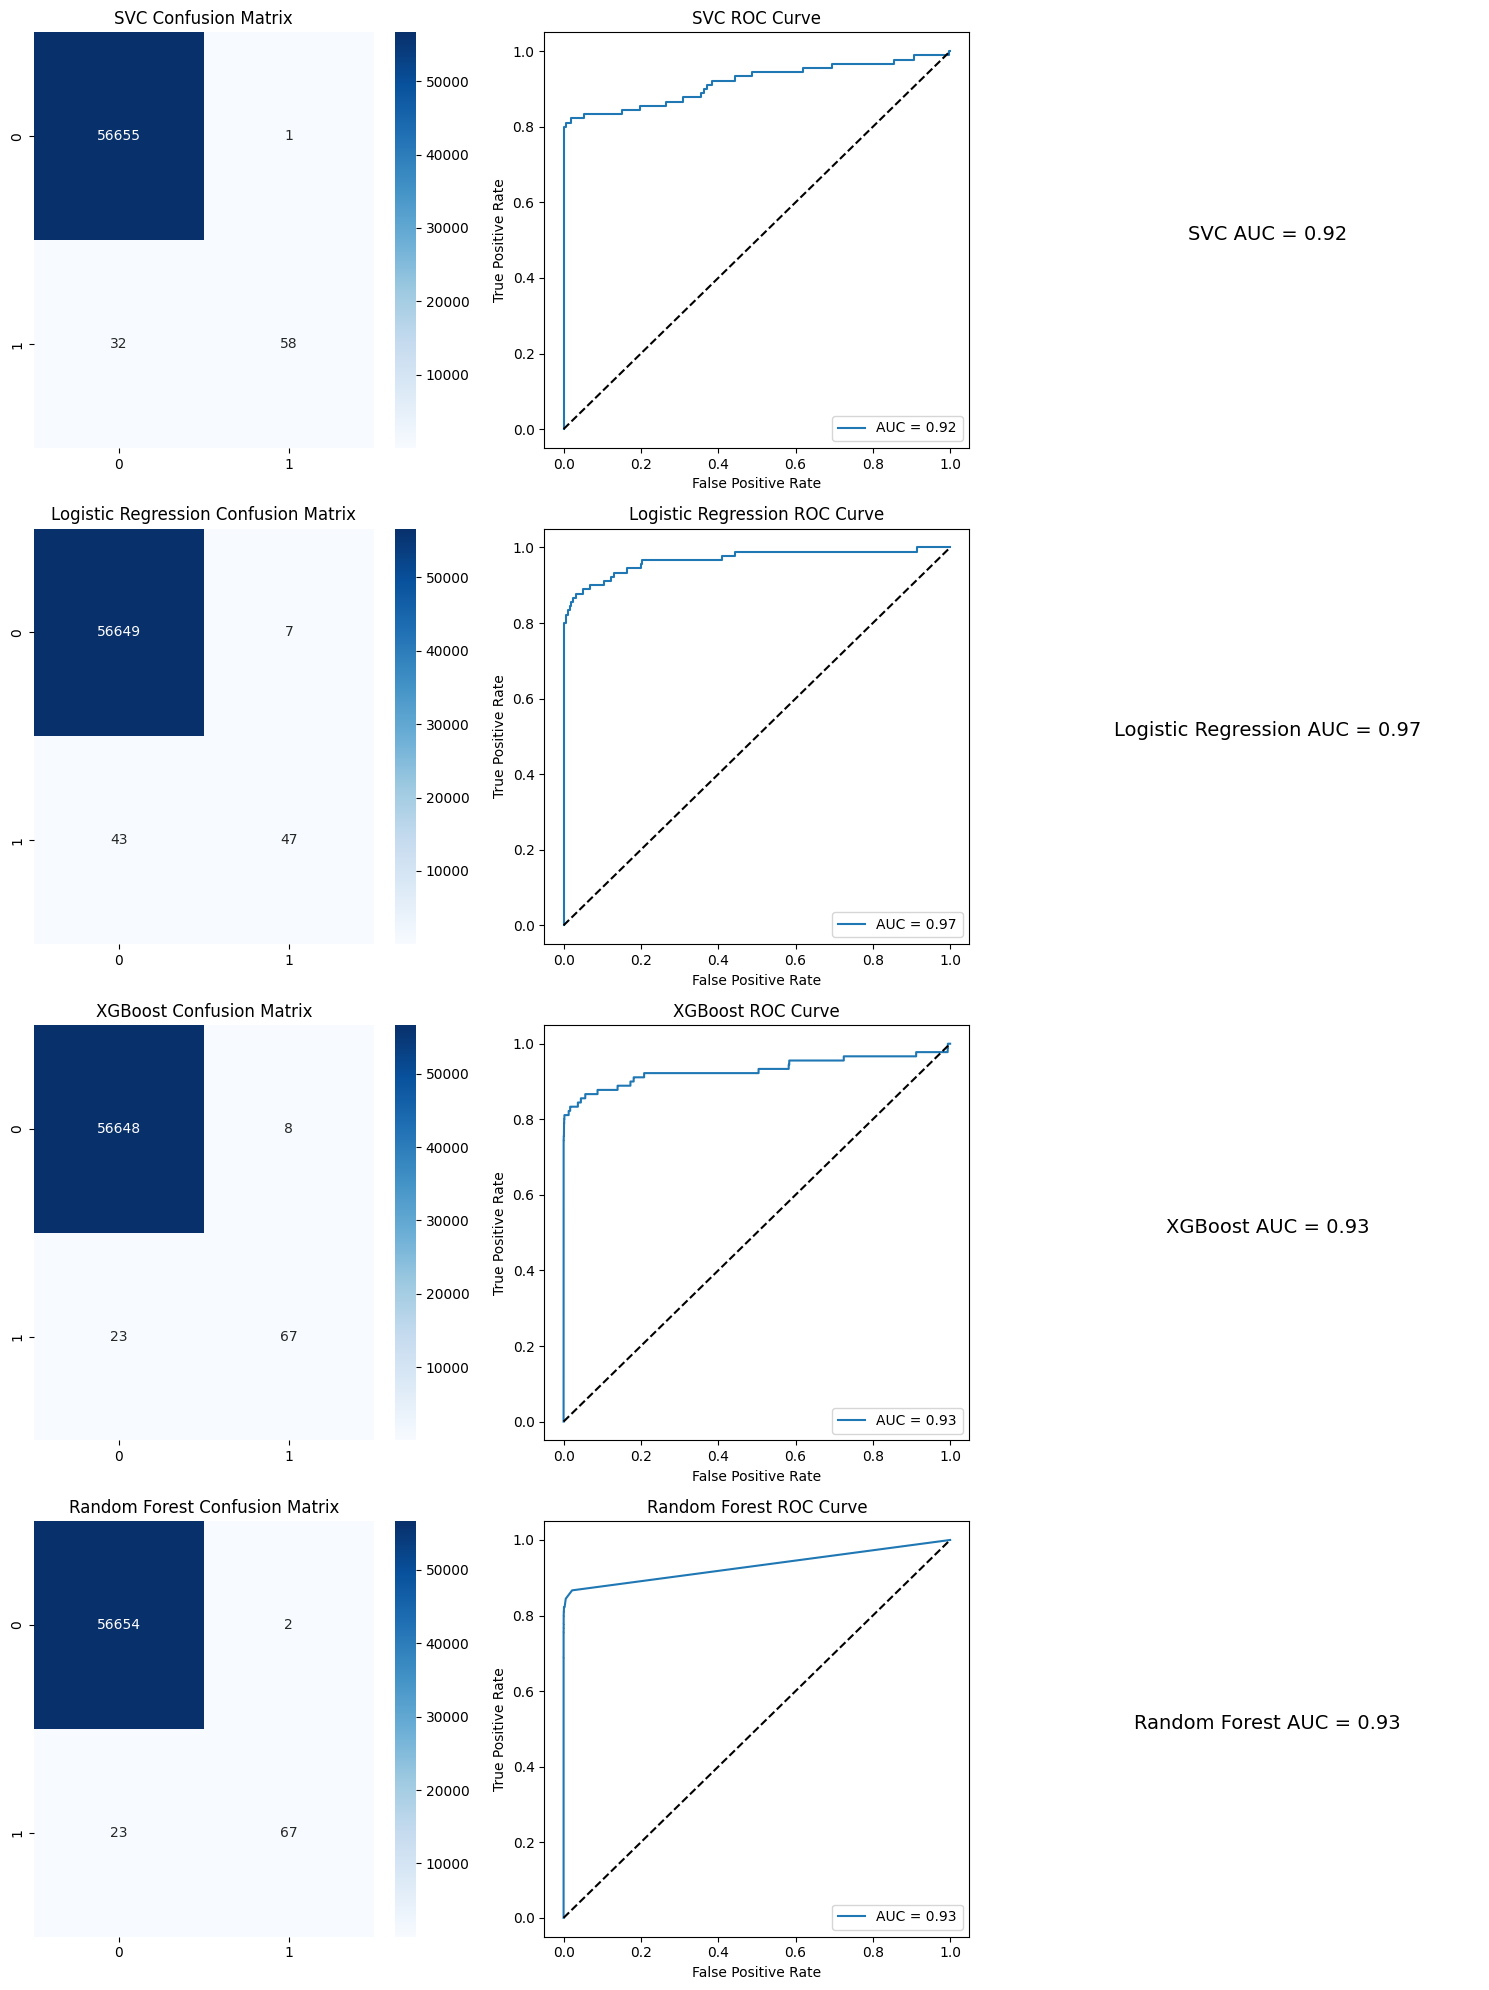

In [ ]:
#Creating the confusion matrix, getting the auc-roc scores and visualizing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Assume you already have
# y_test, y_pred_modelX, and modelX predicted probabilities for each model

models = {
    'SVC': {'model': model1, 'y_pred': y_pred1, 'proba': model1.decision_function(X_test_scaled)},
    'Logistic Regression': {'model': model2, 'y_pred': y_pred2, 'proba': model2.predict_proba(X_test_scaled)[:,1]},
    'XGBoost': {'model': model3, 'y_pred': y_pred3, 'proba': model3.predict_proba(X_test_scaled)[:,1]},
    'Random Forest': {'model': model4, 'y_pred': y_pred4, 'proba': model4.predict_proba(X_test_scaled)[:,1]}
}

# Plot setups
plt.figure(figsize=(15, 5*len(models)))

for i, (name, info) in enumerate(models.items(), 1):
    # Confusion matrix
    plt.subplot(len(models), 3, 3*i-2)
    cm = confusion_matrix(y_test, info['y_pred'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, info['proba'])
    roc_auc = roc_auc_score(y_test, info['proba'])
    plt.subplot(len(models), 3, 3*i-1)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} ROC Curve')
    plt.legend(loc='lower right')

    # AUC score
    plt.subplot(len(models), 3, 3*i)
    plt.text(0.5, 0.5, f'{name} AUC = {roc_auc:.2f}', fontsize=14, ha='center')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Conclusion
It can be observed from the above models that LR got the highest AUC score of almost 97% which makes it pretty good. We can further optimize the other models by optimizing the hyperparameters.